Olá, Isabelle!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

In [3]:
print(data.head())

                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248


In [4]:
print(data.describe())

       DeviceIDHash  EventTimestamp          ExpId
count  2.441260e+05    2.441260e+05  244126.000000
mean   4.627568e+18    1.564914e+09     247.022296
std    2.642425e+18    1.771343e+05       0.824434
min    6.888747e+15    1.564030e+09     246.000000
25%    2.372212e+18    1.564757e+09     246.000000
50%    4.623192e+18    1.564919e+09     247.000000
75%    6.932517e+18    1.565075e+09     248.000000
max    9.222603e+18    1.565213e+09     248.000000


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Os arquivos foram abertos corretamente e previamente estudados usando os métodos `head()`, `info()` e `describe()`.
</div>


In [6]:
data.columns = ['Evento', 'IDDispositivo', 'TimestampEvento', 'IDExperimento']

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

As colunas foram renomeadas. Sugestão: tente usar o padrão `camelcase` ou `snake_case` para nome de colunas e mantenha o padrão por todo o seu código.
</div>


In [7]:
print(data.isnull().sum())

Evento             0
IDDispositivo      0
TimestampEvento    0
IDExperimento      0
dtype: int64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante verificou a existência de dados ausentes.
</div>


In [8]:
print(data.dtypes)

Evento             object
IDDispositivo       int64
TimestampEvento     int64
IDExperimento       int64
dtype: object


In [9]:
data['TimestampEvento'] = pd.to_datetime(data['TimestampEvento'], unit='s')

In [10]:
data['Data'] = data['TimestampEvento'].dt.date

data['Hora'] = data['TimestampEvento'].dt.time

In [11]:
print(data.head())

                    Evento        IDDispositivo     TimestampEvento  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42   

   IDExperimento        Data      Hora  
0            246  2019-07-25  04:43:36  
1            246  2019-07-25  11:11:42  
2            248  2019-07-25  11:28:47  
3            248  2019-07-25  11:28:47  
4            248  2019-07-25  11:48:42  


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Os tipos de dados foram verificados e convertidos para os tipos adequados.
</div>


In [12]:
total_eventos = len(data)
print(f"Total de eventos nos diários: {total_eventos}")

Total de eventos nos diários: 244126


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Perfeito!
</div>


In [13]:
usuarios_unicos = data['IDDispositivo'].nunique()
print(f"Total de usuários nos diários: {usuarios_unicos}")

Total de usuários nos diários: 7551


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O número de usuários únicos foi calculado.
</div>


In [14]:
media_eventos_por_usuario = total_eventos / usuarios_unicos
print(f"Número médio de eventos por usuário: {media_eventos_por_usuario:.2f}")

Número médio de eventos por usuário: 32.33


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O número médio de eventos por usuário foi calculado.
</div>


In [15]:
data_minima = data['TimestampEvento'].min()
data_maxima = data['TimestampEvento'].max()

print(f"Data mínima: {data_minima}")
print(f"Data máxima: {data_maxima}")

Data mínima: 2019-07-25 04:43:36
Data máxima: 2019-08-07 21:15:17


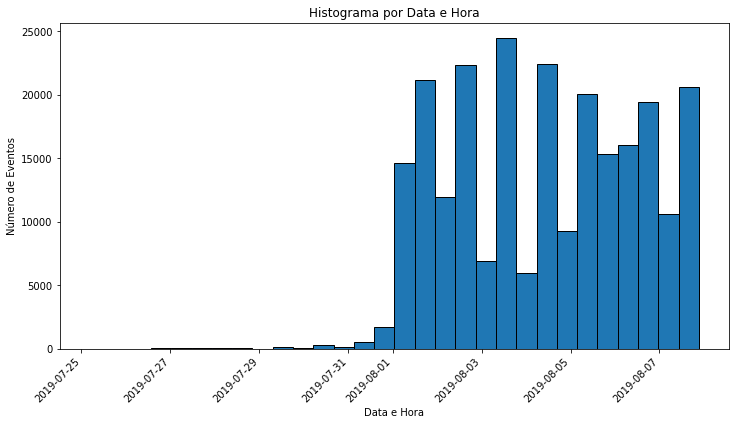

In [16]:
plt.figure(figsize=(12, 6))
plt.hist(data['TimestampEvento'], bins=30, edgecolor='black')
plt.title('Histograma por Data e Hora')
plt.xlabel('Data e Hora')
plt.ylabel('Número de Eventos')

plt.xticks(rotation=45, ha='right')

plt.show()

Com base na análise do gráfico obtido pode-se concluir que há um número mais elevado de eventos à partir do mês 08, sendo os eventos ocorridos no mês 07 de baixa proporção. 

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>Qual a sua interpretação da distribuição dos dados acima? Em qual momento os dados estão mais completos? Descartar eventos antigos impacta na distribuição dos dados?</s>
</div>


<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> Interpretações adicionadas. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>Ok, mas qual é a proporção de eventos que seriam descartados se ignorarmos dados anterior a essa data? Isso pode ser calculado a partir dos eventos disponibilizados. Pense em como você pode usar essa quantidade para chegar à proporção estimada e, com esse resultado, identificar se a quantidade de eventos descartados afetaria a distribuição original dos dados. Além disso, se chegar à conclusão de que a quantidade não afeta a condução do estudo, considere se faz sentido remover esses evento do dataset.</s>
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> Correto, fiz as alterações abaixo. <a class="tocSkip"></a>
</div>

In [17]:
data_corte = pd.to_datetime('2019-08-01')

dados_apos_corte = data[data['TimestampEvento'] >= data_corte]

proporcao_descartados = 1 - len(dados_apos_corte) / len(data)

print(f'Proporção de eventos que seriam descartados: {proporcao_descartados:.2%}')

Proporção de eventos que seriam descartados: 1.16%


A proporção de eventos que seria descartada (1,16%) é considerada aceitável e a remoção dos dados antigos simplifica a análise sem prejudicar significativamente a representatividade do conjunto de dados.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Perfeito!
</div>

In [18]:
data_corte = pd.to_datetime('2019-08-01')

data = data[data['TimestampEvento'] >= data_corte]

In [19]:
grupos_experimentais = data['IDExperimento'].unique()
print(f"Grupos experimentais presentes nos dados: {grupos_experimentais}")

Grupos experimentais presentes nos dados: [246 247 248]


In [20]:
frequencia_eventos = data['Evento'].value_counts().reset_index()
frequencia_eventos.columns = ['Evento', 'Frequência']
print(frequencia_eventos)

                    Evento  Frequência
0         MainScreenAppear      117431
1       OffersScreenAppear       46350
2         CartScreenAppear       42365
3  PaymentScreenSuccessful       34113
4                 Tutorial        1039


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok. Os eventos foram ordenados por frequência.
</div>


In [21]:
usuarios_por_evento = data.groupby('Evento')['IDDispositivo'].nunique().reset_index()
usuarios_por_evento.columns = ['Evento', 'Número de Usuários']
print(usuarios_por_evento)

                    Evento  Número de Usuários
0         CartScreenAppear                3734
1         MainScreenAppear                7419
2       OffersScreenAppear                4593
3  PaymentScreenSuccessful                3539
4                 Tutorial                 840


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O número de usuários únicos por evento foi calculado.
</div>


In [22]:
total_usuarios = data['IDDispositivo'].nunique()
usuarios_executaram_pelo_menos_uma_vez = usuarios_por_evento[usuarios_por_evento['Número de Usuários'] > 0]['Número de Usuários'].count()
proporcao_usuarios_executaram_pelo_menos_uma_vez = usuarios_executaram_pelo_menos_uma_vez / total_usuarios
print(f"Proporção de usuários que executaram pelo menos uma vez: {proporcao_usuarios_executaram_pelo_menos_uma_vez:.2%}")

Proporção de usuários que executaram pelo menos uma vez: 0.07%


In [23]:
funil_eventos = data['Evento'].value_counts().index
funil_proporcoes = []

for i in range(len(funil_eventos) - 1):
    evento_atual = funil_eventos[i]
    evento_seguinte = funil_eventos[i + 1]
    
    usuarios_etapa_atual = data[data['Evento'] == evento_atual]['IDDispositivo'].nunique()
    
    usuarios_etapa_seguinte = data[data['Evento'] == evento_seguinte]['IDDispositivo'].nunique()
    
    proporcao_passagem = usuarios_etapa_seguinte / usuarios_etapa_atual
    
    funil_proporcoes.append({'EtapaAtual': evento_atual, 'EtapaSeguinte': evento_seguinte, 'ProporcaoPassagem': proporcao_passagem})

funil_df = pd.DataFrame(funil_proporcoes)
print(funil_df)

                EtapaAtual            EtapaSeguinte  ProporcaoPassagem
0         MainScreenAppear       OffersScreenAppear           0.619086
1       OffersScreenAppear         CartScreenAppear           0.812976
2         CartScreenAppear  PaymentScreenSuccessful           0.947777
3  PaymentScreenSuccessful                 Tutorial           0.237355


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Proporção em cada etapa do funil calculada.
</div>


In [24]:
maior_perda_fase = funil_df[funil_df['ProporcaoPassagem'] < 1].sort_values('ProporcaoPassagem').iloc[0]
print(f"Fase com maior perda de usuários: {maior_perda_fase['EtapaAtual']} para {maior_perda_fase['EtapaSeguinte']}")

Fase com maior perda de usuários: PaymentScreenSuccessful para Tutorial


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Respondeu à pergunta: "em qual estágio ocorre a perda de maior percentual de usuários?"
</div>


In [25]:
usuarios_primeiro_evento = data[data['Evento'] == funil_df['EtapaAtual'].iloc[0]]['IDDispositivo'].nunique()
usuarios_pagamento = data[data['Evento'] == 'PaymentScreenSuccessful']['IDDispositivo'].nunique()
proporcao_caminho_completo = usuarios_pagamento / usuarios_primeiro_evento
print(f"Parcela de usuários que faz o caminho inteiro até o pagamento: {proporcao_caminho_completo:.2%}")

Parcela de usuários que faz o caminho inteiro até o pagamento: 47.70%


In [26]:
contagem_usuarios_por_grupo = data.groupby('IDExperimento')['IDDispositivo'].nunique()
print(contagem_usuarios_por_grupo)

IDExperimento
246    2484
247    2513
248    2537
Name: IDDispositivo, dtype: int64


In [27]:
from scipy.stats import ttest_ind

In [28]:
grupo_246 = data[data['IDExperimento'] == 246]['IDDispositivo']
grupo_247 = data[data['IDExperimento'] == 247]['IDDispositivo']

stat, p_valor = ttest_ind(grupo_246, grupo_247)

print(f"Estatística do teste t: {stat}")
print(f"Valor p: {p_valor}")

if p_valor < 0.05:
    print("Diferença estatisticamente significativa entre os grupos 246 e 247")
else:
    print("Não há diferença estatisticamente significativa entre os grupos 246 e 247")

Estatística do teste t: -10.49700079384288
Valor p: 9.094481323469247e-26
Diferença estatisticamente significativa entre os grupos 246 e 247


In [29]:
evento_mais_popular = data['Evento'].value_counts().idxmax()
print(f"Evento mais popular: {evento_mais_popular}")

Evento mais popular: MainScreenAppear


In [30]:
def teste_estatistico_por_evento(data, evento, grupo_controle_1, grupo_controle_2, grupo_teste):
    
    dados_grupo_controle_1 = data[(data['IDExperimento'] == grupo_controle_1) & (data['Evento'] == evento)]['IDDispositivo']
    dados_grupo_controle_2 = data[(data['IDExperimento'] == grupo_controle_2) & (data['Evento'] == evento)]['IDDispositivo']
    dados_grupo_teste = data[(data['IDExperimento'] == grupo_teste) & (data['Evento'] == evento)]['IDDispositivo']

    _, p_valor_controle_1_controle_2 = ttest_ind(dados_grupo_controle_1, dados_grupo_controle_2)
    _, p_valor_controle_1_teste = ttest_ind(dados_grupo_controle_1, dados_grupo_teste)
    _, p_valor_controle_2_teste = ttest_ind(dados_grupo_controle_2, dados_grupo_teste)

    return p_valor_controle_1_controle_2, p_valor_controle_1_teste, p_valor_controle_2_teste

In [31]:
grupo_controle_1 = 246
grupo_controle_2 = 247
grupo_teste = 248

p_valor_controle_1_controle_2, p_valor_controle_1_teste, p_valor_controle_2_teste = teste_estatistico_por_evento(data, evento_mais_popular, grupo_controle_1, grupo_controle_2, grupo_teste)

print(f"P-valor entre grupos de controle 246 e 247 para o evento mais popular: {p_valor_controle_1_controle_2}")
print(f"P-valor entre grupo de controle 246 e grupo de teste para o evento mais popular: {p_valor_controle_1_teste}")
print(f"P-valor entre grupo de controle 247 e grupo de teste para o evento mais popular: {p_valor_controle_2_teste}")

P-valor entre grupos de controle 246 e 247 para o evento mais popular: 5.1858664140087525e-06
P-valor entre grupo de controle 246 e grupo de teste para o evento mais popular: 0.585147752596787
P-valor entre grupo de controle 247 e grupo de teste para o evento mais popular: 1.6094303938708042e-07


In [32]:
numero_eventos_distintos = data['Evento'].nunique()

numero_testes_hipoteses = numero_eventos_distintos * 3

nivel_significancia_padrao = 0.05

nivel_significancia_corrigido = nivel_significancia_padrao / numero_testes_hipoteses

print(f"Número total de testes de hipóteses: {numero_testes_hipoteses}")
print(f"Nível de significância corrigido (método de Bonferroni): {nivel_significancia_corrigido}")

Número total de testes de hipóteses: 15
Nível de significância corrigido (método de Bonferroni): 0.0033333333333333335


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Os testes estatísticos foram calculados para os grupos de usuários.
</div>


<b>Total de Eventos e Usuários:</b> 
Há um total de 244.126 eventos registrados nos diários, envolvendo 7.551 usuários.
Cada usuário, em média, interagiu aproximadamente 32,33 vezes com o aplicativo durante o período de 14 dias.
    
<b>Período de Análise:</b>
Os dados cobrem um período de 14 dias, desde 25 de julho de 2019 até 7 de agosto de 2019.
    
<b>Grupos Experimentais:</b>
Existem três grupos experimentais nos dados: 246, 247 e 248.
    
<b>Funil de Eventos:</b>
O funil de eventos mostra a progressão dos usuários através das etapas principais: MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful e Tutorial, mostrando que há uma considerável perda de usuários ao longo do processo.
A fase com a maior perda de usuários é de PaymentScreenSuccessful para Tutorial.
A parcela de usuários que fazem o caminho inteiro até o pagamento é de 47,70%.
    
<b>Experimento A/A/B:</b>
O teste A/A/B entre os grupos 246, 247 e 248 revelou diferenças estatisticamente significativas entre os grupos 246 e 247.
O teste de hipótese para o evento mais popular, MainScreenAppear, não mostrou diferenças significativas entre os grupos 246 e 248, mas houve diferenças entre os grupos 246-247 e 247-248.

<b>Resultados do Teste de Hipóteses:</b>
Os p-valores dos testes de hipóteses foram ajustados usando o método de Bonferroni devido ao grande número de comparações (15 testes).
Para o evento mais popular, MainScreenAppear, não houve diferença estatisticamente significativa entre o grupo de controle 246 e o grupo de teste 248. No entanto, houve diferenças significativas entre os grupos 246-247 e 247-248.
    
<b>Número de Testes de Hipóteses:</b>
Foram realizados 15 testes de hipóteses para diversos eventos.
O nível de significância corrigido usando o método de Bonferroni é 0,0033.
    
<b>Conclusões Gerais:</b>
A mudança nas fontes no grupo 248 pode ter impacto em alguns eventos em comparação com os grupos de controle 246 e 247.
O evento mais popular, MainScreenAppear, parece não ser afetado significativamente pelas mudanças nas fontes, mas outros eventos podem apresentar diferenças.
Analisar eventos específicos que mostraram diferenças significativas entre os grupos para entender melhor o impacto da mudança nas fontes.
Explorar visualizações adicionais e segmentações para obter insights mais detalhados sobre o comportamento dos usuários.

<div class="alert alert-block alert-danger">
<b> Comentário revisor:</b> <a class="tocSkip"></a>

<s>Apresente conclusões intermediárias das suas análises e não somente a execução do código. Essa etapa é importante para que possamos avaliar a sua forma de pensar e resolver os problemas.</s>
</div>


<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> Foi alterado, adicionando também conclusões intermediárias. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>

<s>Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado usando funções
- Comentários sucintos e bem objetivos
- Análises bem detalhadas em cada etapa do projeto
    
Entretanto, deixei alguns comentários em alguns trechos que precisam de ajuste. Além dos comentários que deixei, você poderia ter usado mais gráficos para analisar os dado do funil de forma mais ilustrativa. 
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**</s>

</div>


<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v2</b> <a class="tocSkip"></a>

<s>Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu projeto está bem melhor. Entretanto, precisamos ainda trabalhar um pouco mais na análise da distribuição dos dados de eventos. Estamos quase lá, mais alguns poucos ajustes e chegamos a uma boa solução.
    
<br>
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**</s>

</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v3</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
    
Te desejo uma jornada de muito sucesso e aprendizado.
    
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**

</div>